# 1. Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [87]:
# Reading the data
df = pd.read_csv(r"C:\Users\Divyanshu\Downloads\world_population.csv")



# 2. Dataset 

- Rank - Rank by Population
- CCA3 - 3 Digit Country/Territories Code
- Country - Name of the Country
- Continent - Name of the Continent
- 2023 Population - Population of the Country in the year 2023
- 2022 Population - Population of the Country in the year 2022
- 2020 Population - Population of the Country in the year 2020
- 2015 Population - Population of the Country in the year 2015
- 2010 Population - Population of the Country in the year 2010
- 2000 Population - Population of the Country in the year 2000
- 1990 Population - Population of the Country in the year 1990
- 1980 Population - Population of the Country in the year 1980
- 1970 Population - Population of the Country in the year 1970
- Area (km²) - Area size of the Country/Territories in square kilometer
- Density (km²) - Population Density per square kilometer
- Growth Rate - Population Growth Rate by Country
- World Population Percentage - The population percentage by each Country

In [88]:
df.head(n=5).style.set_properties(**{"background-color": "#417894","color":"white","border": "1.5px  solid black"})

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.058700,1.025700,0.520000
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.870200,0.995700,0.040000
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.853100,1.016400,0.560000
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.477400,0.983100,0.000000
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.564100,1.010000,0.000000


# 3. Exploration

In [89]:
# Checking shape of the dataset
print(f"Shape Of The Dataset: {df.shape}")

Shape Of The Dataset: (234, 17)


### Summary of the Dataset

In [90]:
df.describe().style.set_properties(**{"background-color": "#417885", "color": "white", "border": "1.5px solid black"})

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34074414.709402,33501070.952991,31729956.243590,29845235.034188,26269468.816239,22710220.790598,18984616.970085,15786908.807692,581449.384615,452.127044,1.009577,0.427051
std,67.694165,136766424.804763,135589876.924439,130404992.751760,124218487.632998,111698206.719070,97832173.346751,81785186.084201,67795091.643236,1761840.864063,2066.121904,0.013385,1.714977
min,1.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,1.000000,0.026100,0.912000,0.000000
25%,59.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,38.417875,1.001775,0.010000
50%,117.500000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,95.346750,1.007900,0.070000
75%,175.750000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,238.933250,1.016950,0.280000
max,234.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,23172.266700,1.069100,17.880000


### Data Types

In [91]:
# information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

### Checking the Missing Value

In [92]:
# Checking if there any Null value present in the dataset
df.isnull().sum().to_frame().T.style.set_properties(**{"background-color": "#417885","color":"white","border": "1.5px  solid black"})

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4. Dataset Summary

### Duplicate Value

In [93]:
# Checking if there any duplicate value present in the dataset
print(f'There is {df.duplicated().sum()} duplicate value.')

There is 0 duplicate value.


### Unique Value

In [94]:
# Checking the number of unique values
df.nunique().to_frame().T.style.set_properties(**{"background-color": "#417885", "color": "white", "border": "1.5px solid black"})

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,234,234,234,234,6,234,234,234,234,234,234,234,234,233,234,180,70


### Data Types of the Features

In [95]:
df.dtypes.to_frame().T.style.set_properties(**{"background-color": "#417894","color":"white","border": "1.5px  solid black"})

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64


In [96]:
# Summary statistics for categorical columns
df.describe(include="object").T.style.set_properties(**{"background-color": "#417894","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
CCA3,234,234,AFG,1
Country/Territory,234,234,Afghanistan,1
Capital,234,234,Kabul,1
Continent,234,6,Africa,57


# 5. Population Across Continent

### Distribution of Countries by Continent

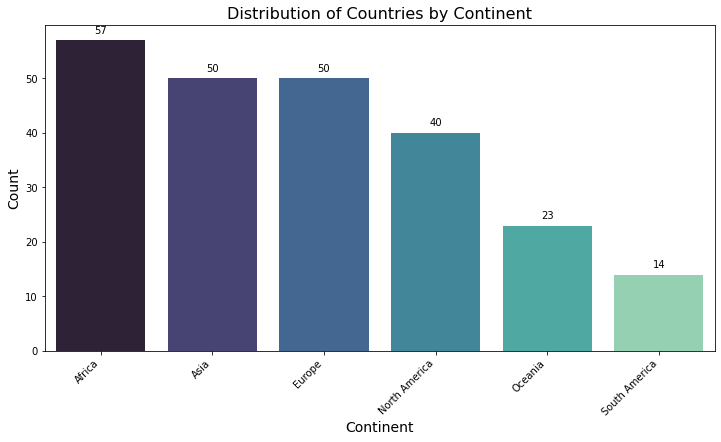

In [97]:
# Ensure column names are stripped of extra spaces and converted to lowercase
df.columns = df.columns.str.strip().str.lower()

# Check if 'continent' is in the DataFrame
if 'continent' in df.columns:
    # Set a color palette for the countplot
    palette = "mako"

    # Countplot of population distribution by continent
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x='continent', data=df, order=df['continent'].value_counts().index, palette=palette)

    # Display values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Title and labels
    plt.title('Distribution of Countries by Continent', fontsize=16)
    plt.xlabel('Continent', fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Remove grid lines
    ax.yaxis.grid(False)

    # Show the plot
    plt.show()
else:
    print("Column 'continent' not found in the DataFrame.")


### Continent-wise Population

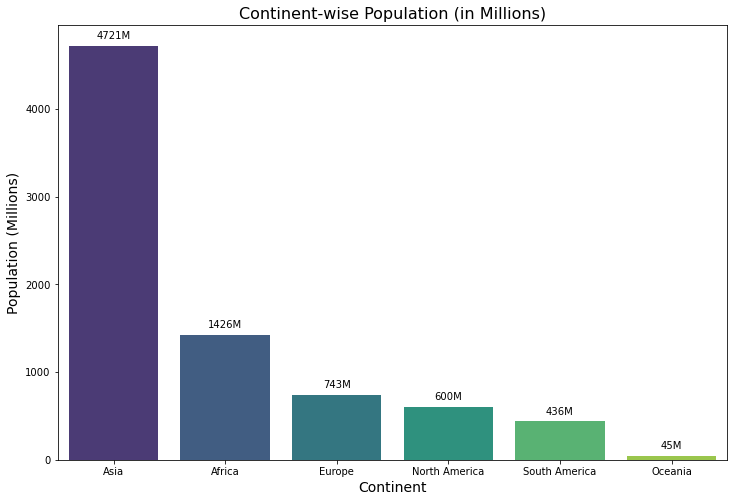

In [98]:
# Calculate total population for each continent
continent_population = df.groupby('continent')['2022 population'].sum() / 1e6

# Sort the continents by population
sorted_continents = continent_population.sort_values(ascending=False).index

# Set color palette for the bar plot
palette = "viridis"

# Create a vertical bar plot using seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sorted_continents, y=continent_population[sorted_continents], palette=palette)

# Add values at the top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Continent-wise Population (in Millions)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population (Millions)', fontsize=14)

# Show the plot
plt.show()

### Continent-wise Population Distribution

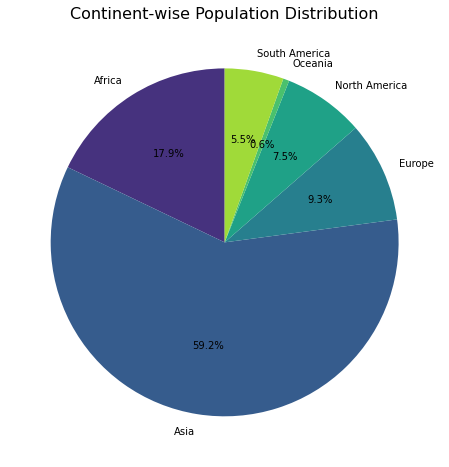

In [99]:
# Set a color palette for the pie chart
colors = sns.color_palette('viridis')

# Calculate total population for each continent
continent_population = df.groupby('continent')['2022 population'].sum()

# Create a full pie chart with the custom palette
plt.figure(figsize=(10, 8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Title
plt.title('Continent-wise Population Distribution', fontsize=16)

# Show the plot
plt.show()

# 6. Population Facts

### Top 10 Most Populated Countries

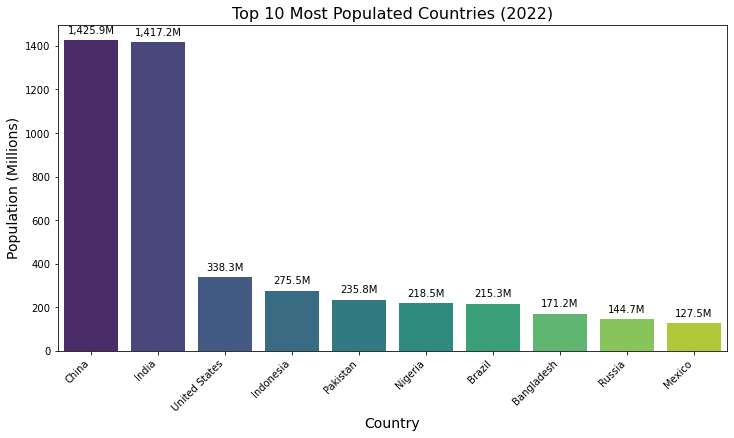

In [100]:
# Convert population to millions
df['2022 population (millions)'] = df['2022 population'] / 1e6

# Sort the DataFrame by population in descending order
df_sorted = df.sort_values(by='2022 population (millions)', ascending=False)

# Take the top 10 populated countries
top_10_countries = df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country/territory', y='2022 population (millions)', data=top_10_countries, palette='viridis')

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.1f}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Top 10 Most Populated Countries (2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population (Millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

### Top 10 Least Populated Countries

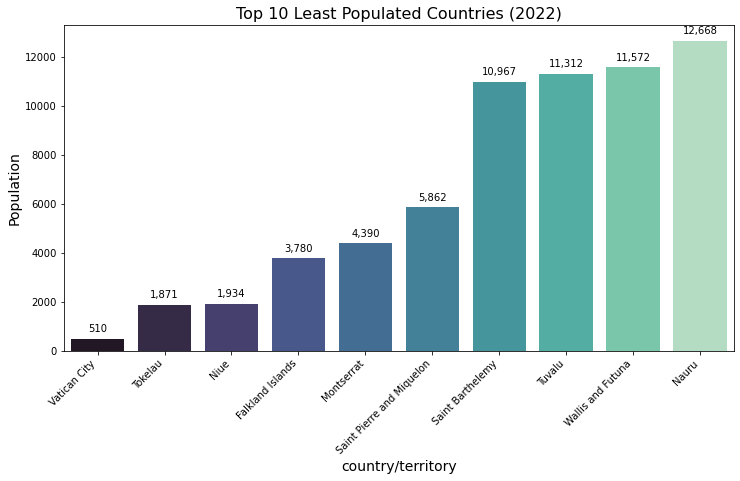

In [101]:
# Sort the DataFrame by population in ascending order
df_sorted = df.sort_values(by='2022 population')

# Take the bottom 10 populated countries (least populated)
bottom_10_countries = df_sorted.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=bottom_10_countries, palette='mako')

# Display values at the top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Top 10 Least Populated Countries (2022)', fontsize=16)
plt.xlabel('country/territory', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

### Top 10 Countries in Asia

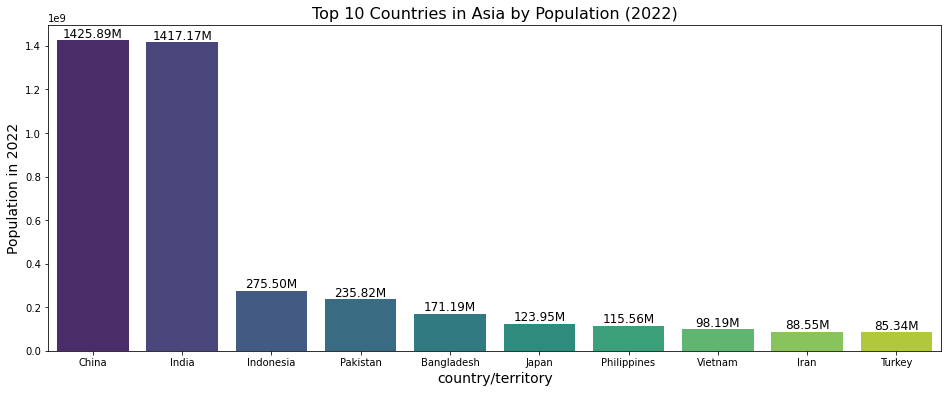

In [102]:
# Filter data for Asia and sort by population in 2022
asia_population_2023 = df[df['continent'] == 'Asia'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in Asia by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=asia_population_2023, palette='viridis')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in Asia by Population (2022)', fontsize=16)
plt.xlabel('country/territory', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

### Top 10 Countries in Africa

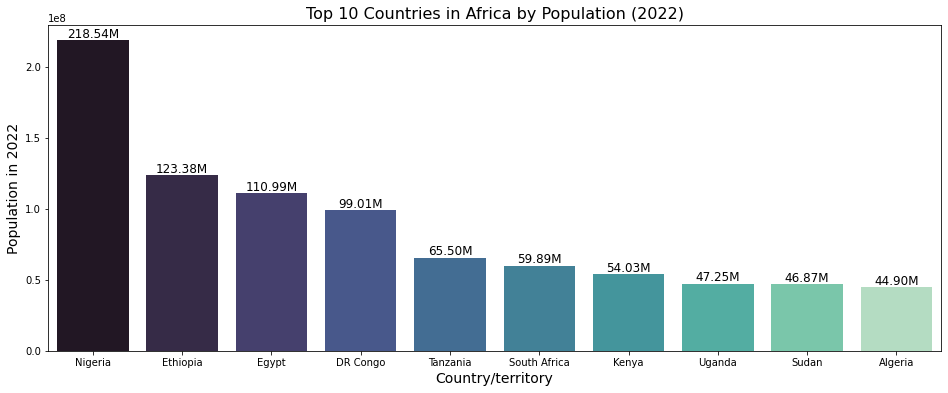

In [103]:
# Filter data for Africa and sort by population in 2022
africa_population_2023 = df[df['continent'] == 'Africa'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in Africa by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=africa_population_2023, palette='mako')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in Africa by Population (2022)', fontsize=16)
plt.xlabel('Country/territory', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

### Top 10 Countries in Europe

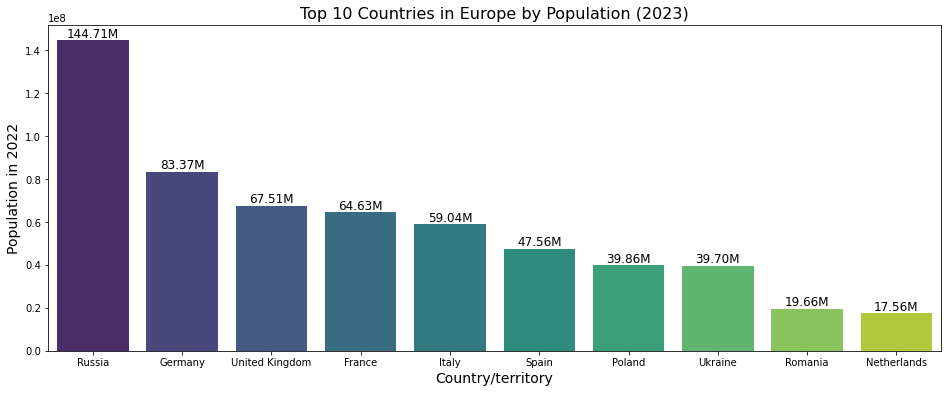

In [104]:
# Filter data for Europe and sort by population in 2022
europe_population_2022 = df[df['continent'] == 'Europe'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in Europe by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=europe_population_2022, palette='viridis')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in Europe by Population (2023)', fontsize=16)
plt.xlabel('Country/territory', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

### Top 10 Countries in North America

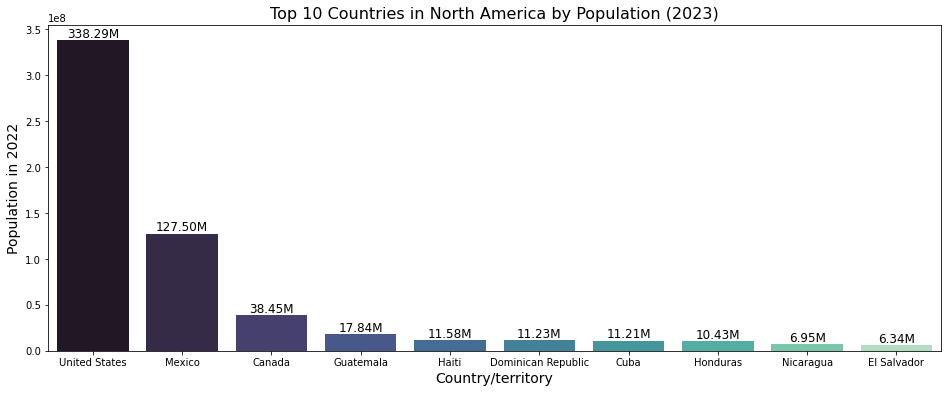

In [105]:
# Filter data for North America and sort by population in 2022
namerica_population_2022 = df[df['continent'] == 'North America'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in North America by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=namerica_population_2022, palette='mako')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in North America by Population (2023)', fontsize=16)
plt.xlabel('Country/territory', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

### Top 10 Countries in Souh America

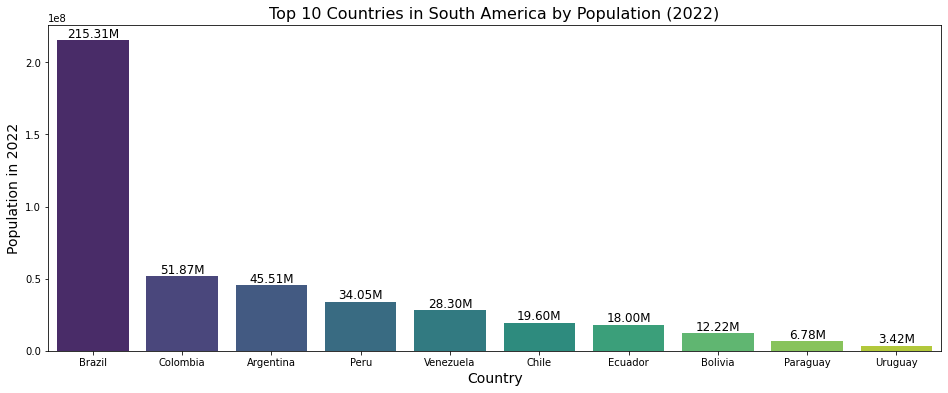

In [106]:
# Filter data for South America and sort by population in 2022
south_america_population_2023 = df[df['continent'] == 'South America'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in South America by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=south_america_population_2023, palette='viridis')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in South America by Population (2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

### Top 10 Countries in Ocenia

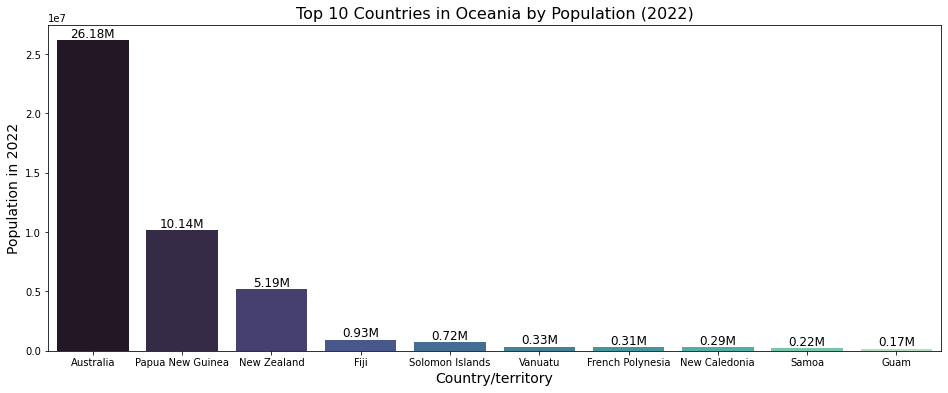

In [107]:
# Filter data for Oceania and sort by population in 2022
oceania_population_2022 = df[df['continent'] == 'Oceania'].sort_values(by='2022 population', ascending=False).head(10)

# Vertical bar plot for top 10 countries in Oceania by population in 2022
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='country/territory', y='2022 population', data=oceania_population_2022, palette='mako')

# Add population values at the top of each bar in millions
for p in ax.patches:
    ax.annotate(f'{p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Top 10 Countries in Oceania by Population (2022)', fontsize=16)
plt.xlabel('Country/territory', fontsize=14)
plt.ylabel('Population in 2022', fontsize=14)

# Remove grid lines
ax.yaxis.grid(False)

plt.show()

# 7. World Population

### Geographical Analysis of Population

In [108]:
# Create a choropleth map for the world population 
fig = px.choropleth(df,
                    locations='cca3',
                    color='2022 population',
                    hover_name='country/territory',
                    color_continuous_scale='YlGnBu',
                    title='World Population Distribution',
                    labels={'2022 population': 'Population'},
                    height=800,
                    width=1200)

# Show the interactive map
fig.show()

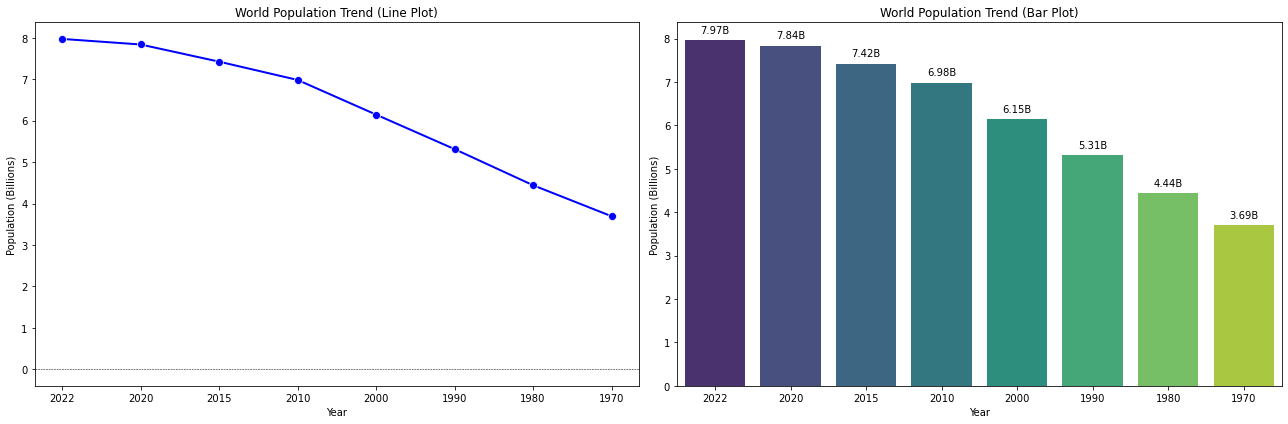

In [111]:
# Set color palette for both plots
palette = "viridis"

# Extracting world population data for the line and bar plots
world_population = df[['2022 population', '2020 population', '2015 population', '2010 population', '2000 population', '1990 population', '1980 population', '1970 population']].sum() / 1e9
years = ['2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']

# Subplots
plt.figure(figsize=(18, 6))

# First subplot for the line plot
plt.subplot(1, 2, 1)
sns.lineplot(x=years, y=world_population, marker="o", linewidth=2, markersize=8, color="blue")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.title('World Population Trend (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')

# Second subplot for the bar plot
plt.subplot(1, 2, 2)
bar_plot = sns.barplot(x=years, y=world_population, palette=palette)
plt.title('World Population Trend (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')

# Annotate each bar with the population values in billions
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}B', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Remove y-axis gridlines for the bar plot
bar_plot.yaxis.grid(False)

plt.tight_layout()
plt.show()


### Growth Rate vs. Population Density (Interactive)

In [115]:
# Create a custom color palette similar to viridis
custom_palette = ["#440154", "#482677", "#3E4989", "#31688E", "#26828E", "#1F9E89", "#35B779", "#6DCD59", "#B4DE2C", "#FDE725"]

# Scatter plot for growth rate and population density with Plotly
fig = px.scatter(df, 
                 x='density (per km²)', 
                 y='growth rate', 
                 color='continent', 
                 size='2022 population',
                 hover_name='country/territory', 
                 title='Growth Rate vs. Population Density',
                 labels={'density (per km²)': 'Population Density (people/km²)', 'growth rate': 'Growth Rate'},
                 size_max=30,
                 color_discrete_sequence=custom_palette)  # Set custom color palette

# Update layout for better fitting
fig.update_layout(
    width=1200,
    height=800,
)

# Show the interactive plot
fig.show()


# ThankYou